# Take-Home Challenge 2: Relax Inc

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [282]:
#a usage summary 
user_eng = pd.read_csv('takehome_user_engagement.csv')

#user table on users who purchase product in last two years
users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [283]:

users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [284]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [285]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [286]:
user_eng['time_stamp2'] = pd.to_datetime(user_eng['time_stamp'])


In [287]:
#Functions

def keep_repeat_users(df,visited=3):
    '''
    returns dataframe containing all users who have logged on at least the 
    "the visited" amount 
    '''
    new_df = df.groupby('user_id').filter(lambda x:len(x)>= visited)
    return new_df


def active_users(period, days_logged,user):
    '''
    returns whether or not the user had 3 consecutive logins within 7 days
    '''
    
    import pandas as pd
    from pandas import DataFrame, Series

    visited = len(user.index) #get the number of times the user logged in
    i, count = 0, 1
    active_user = False

    while count < days_logged:
        if (i+2) < visited: #needs to be at least 3 entries left	
            if (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i]) > pd.Timedelta(days=1) :
                count += 1 #logged in twice within a 7 day period
                new_timeframe = (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i])
                if (user['time_stamp2'].iloc[i + 2] - user['time_stamp2'].iloc[i + 1]) <= new_timeframe and (user['time_stamp2'].iloc[i + 2] - user['time_stamp2'].iloc[i + 1]) > pd.Timedelta(days=1):
                    active_user = True #they logged in three times within a 7 period window
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return active_user

def keep_active_users(df):
    """
    OUTPUT
    unique_active_peeps: a dataframe of unique adopted users
    """
    import pandas as pd
    from pandas import DataFrame, Series

    active_peeps = df.filter(lambda x: active_users(period=7, days_logged=3, user=x) ==True)

    unique_active_peeps = DataFrame(Series.unique(active_peeps['user_id']))
    unique_active_peeps.columns = ['user_id']

    return unique_active_peeps

In [288]:
#keep users who logged in at least 3 days
repeated_users_df = keep_repeat_users(user_eng)

In [289]:
#split data by user_id
grouped_users_df = repeated_users_df.groupby('user_id')

In [290]:
#apply function to see if logged 3 seperate days in 7 day period
unique_active_peeps_df = keep_active_users(grouped_users_df)

In [291]:
#create an indicator variable if they are an adopted user or not
unique_active_peeps_df['adopted_user'] = 1

In [292]:
#merge adopted user dataframe with original
adopted_user_info = pd.merge(unique_active_peeps_df,users,how='outer',
                            left_on = 'user_id',right_on='object_id')

In [293]:
#fill non-adopted users in with 0
adopted_user_info['adopted_user'] = adopted_user_info['adopted_user'].fillna(0)


In [294]:
len(adopted_user_info)

12000

In [295]:
adopted_user_info.head()

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0


In [296]:
adopt_merge = adopted_user_info[['adopted_user','object_id']]

In [297]:
adopt_merge.head()

,adopted_user,object_id
0,1.0,2
1,1.0,10
2,1.0,33
3,1.0,42
4,1.0,50


In [298]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [299]:
#create a dataframe that contains all users including adopted 
users_df = pd.merge(users,adopt_merge,how='left',on=['object_id','object_id'])

In [300]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [301]:
users_df['adopted_user'].value_counts()

0.0    10385
1.0     1615
Name: adopted_user, dtype: int64

Text(0.5, 1.0, 'Adopted users vs. non-adopated')

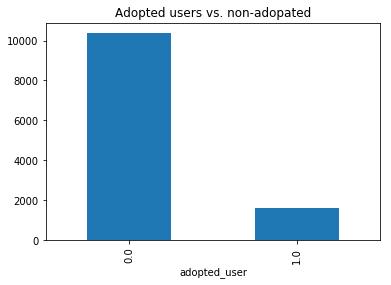

In [302]:
users_df.groupby('adopted_user').size().plot(kind='bar')
plt.title('Adopted users vs. non-adopated')

In [303]:
print('total users:',10385+1615)
print('adopted users contribute to', round(1615/12000,2), ' of total users')

total users: 12000
adopted users contribute to 0.13  of total users


The graph shows the distribution of adopted users compared to normal users. Adopted users contribute to **13%** of total users.

## Predictive modeling

lets determine which factors best predict future users, we will do this with classification machine learning models. 

#### preprocessing

In [304]:
#need to convert our object data into numeric 
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [305]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [306]:
#drop columns that will not predict well with our model
users_df = users_df.drop('object_id',axis=1)
users_df = users_df.drop('name',axis=1)
users_df = users_df.drop('email',axis=1)
users_df = users_df.drop('creation_time',axis=1)


In [307]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 750.0+ KB


In [308]:
users_df_model = pd.get_dummies(users_df,columns=['creation_source'],drop_first=True)

In [309]:
users_df_model.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,10803.0,0.0,0,0,0,0
1,1.396238e+09,0,0,1,316.0,1.0,1,0,0,0
2,1.363735e+09,0,0,94,1525.0,0.0,1,0,0,0
3,1.369210e+09,0,0,1,5151.0,0.0,0,0,0,0
4,1.358850e+09,0,0,193,5240.0,0.0,0,0,0,0


In [313]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = users_df_model.drop('adopted_user',axis=1)
y = users_df_model['adopted_user'].copy()

In [314]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [315]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [318]:
X.columns

Index(['last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [322]:
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.67%


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


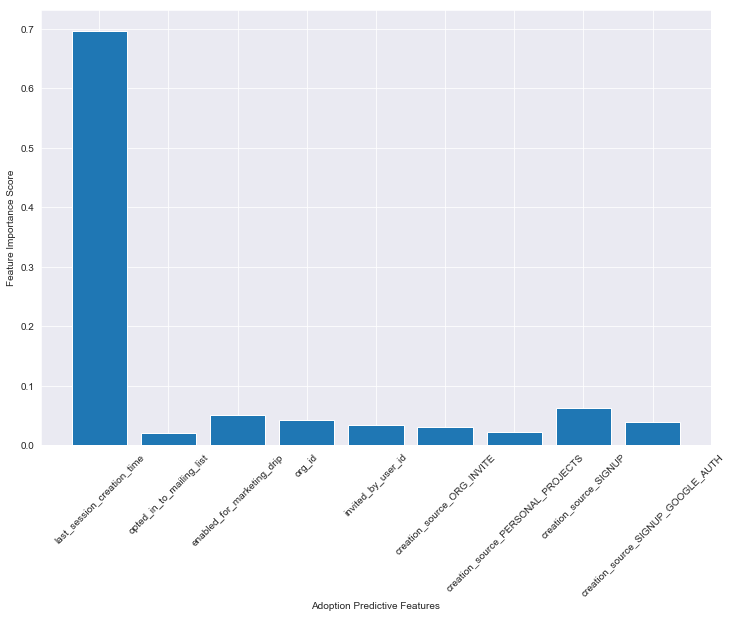

In [320]:
feat_imp = xgb.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
xcol = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()


Our accuracy for our model is **91.67** Which is pretty goo